<a href="https://colab.research.google.com/github/nyang98/samples/blob/master/Temperature_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

In [28]:
import math

In [29]:
from google.colab import files

In [4]:
file= files.upload()

Saving temptest4 to temptest4


In [30]:
content = file['temptest4']

In [31]:
content = content.decode("utf-8")

In [33]:
content = content.split('\n')

In [34]:
content

['=~=~=~=~=~=~=~=~=~=~=~= PuTTY log 2019.12.10 15:47:41 =~=~=~=~=~=~=~=~=~=~=~=\r',
 'Temperature Readings\r',
 'Time (s): 0Temperature (C): 22.75\r',
 'Time (s): 1Temperature (C): 22.75\r',
 'Time (s): 2Temperature (C): 23.00\r',
 'Time (s): 3Temperature (C): 26.25\r',
 'Time (s): 4Temperature (C): 31.00\r',
 'Time (s): 5Temperature (C): 32.25\r',
 'Time (s): 6Temperature (C): 32.50\r',
 'Time (s): 7Temperature (C): 31.75\r',
 'Time (s): 9Temperature (C): 31.00\r',
 'Time (s): 10Temperature (C): 30.50\r',
 'Time (s): 11Temperature (C): 29.50\r',
 'Time (s): 12Temperature (C): 29.00\r',
 'Time (s): 13Temperature (C): 28.25\r',
 'Time (s): 14Temperature (C): 27.75\r',
 'Time (s): 15Temperature (C): 27.25\r',
 'Time (s): 16Temperature (C): 27.50\r',
 'Time (s): 17Temperature (C): 30.25\r',
 'Time (s): 18Temperature (C): 31.00\r',
 'Time (s): 19Temperature (C): 31.25\r',
 'Time (s): 20Temperature (C): 31.50\r',
 'Time (s): 21Temperature (C): 31.75\r',
 'Time (s): 22Temperature (C): 31.75\

In [35]:
a = 'Time (s): 0Temperature (C): 22.75\r'

In [36]:
trial={}

In [37]:
a.split('Temperature 1 (C): ')[0].split('Time (s): ')[1]

'0Temperature (C): 22.75\r'

In [38]:
trial['temperature']= a.split('Temperature (C): ')[1].split('\r')[0]

In [39]:
def row_to_dict(a):
  trial={}
  trial['time']= float(a.split('Temperature (C): ')[0].split('Time (s): ')[1])
  trial['temperature']= float(a.split('Temperature (C): ')[1].split('\r')[0])
  return trial

In [40]:
file_list = content[2:-1]

In [41]:
file_list = [row_to_dict(x) for x in file_list]

In [ ]:
df = pd.DataFrame(file_list)

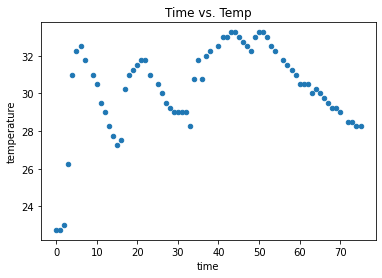

In [50]:
df.plot(kind='scatter',x='time',y='temperature',title='Time vs. Temp');

In [44]:
  first_time = df['time'][0]
  max_time = df['time'].max()
  first_temp = df['temperature'][0]
  max_temp = df['temperature'].max()
  time_at_max = df.loc[df['temperature'] == max_temp]
  change_in_temp = max_temp - first_temp + float(273)

In [19]:
def solar_flux():
  window = 0.88
  spec_heat = float(0.24)
  target_diam = float(input("Target Diameter (m)= "))
  target_area = math.pi * pow((target_diam/2),2)

  def mult_max_times(x):
    if len(time_at_max)>1:
     return time_at_max.mean()
    else:
     return time_at_max

  total_energy = spec_heat * mass * change_in_time
  power = total_energy/max_time
  flux = power/target_area
  target_flux = flux/target_abs
  print('Solar Flux Incedent on Meter is')
  print(str(target_flux) + ' W/m^2')

In [45]:
def black_body():
  target_diam = float(input("Target Diameter (m)= "))
  target_area = math.pi * pow((target_diam/2),2)
  e = float(input("Emissivity= "))
  boltz = pow(5.67,-8)
  change_in_temp = max_temp - first_temp + float(273)
  power = target_area * e * boltz * pow(change_in_temp,4)
  print('Blackbody Radiation is')
  print(str(power) + ' W')



In [46]:
def cond_heat():
    target_diam = float(input("Target Diameter (m)= "))
    target_area = math.pi * pow((target_diam/2),2)
    contact_area = 0.0001
    length = float(input("Target Length (m)= "))
    density = float(input("Density of target (kg/m^3)= "))
    mass = density * math.pi * target_area * 100
    spec_heat = float(input("Specific Heat of Target (J/gK)= ")) 
    k = float(input("Thermal Conductivity of Target W/mK)= "))
    energy = k * change_in_temp / target_diam * spec_heat

    print('Total Conductive Heat is')
    print(str(energy) + ' W')
  

In [47]:
print('What would you like to calculate?:\n')
print('Radiative Heat In\n')
print('Radiative Heat Out\n')
print('Conductive Heat\n')
choice = str(input('Enter your choice: '))

if (choice == 'Radiative Heat In'):
    solar_flux()
elif (choice == 'Radiative Heat Out'):
    black_body()
elif (choice == 'Conductive Heat'):
    cond_heat()
else:
    print('Invalid choice')

What would you like to calculate?:

Radiative Heat In

Radiative Heat Out

Conductive Heat

Enter your choice: Conductive Heat
Target Diameter (m)= .3
Target Length (m)= .1
Density of target (kg/m^3)= .34
Specific Heat of Target (J/gK)= 23
Thermal Conductivity of Target W/mK)= 32
Total Conductive Heat is
695520.0 W
